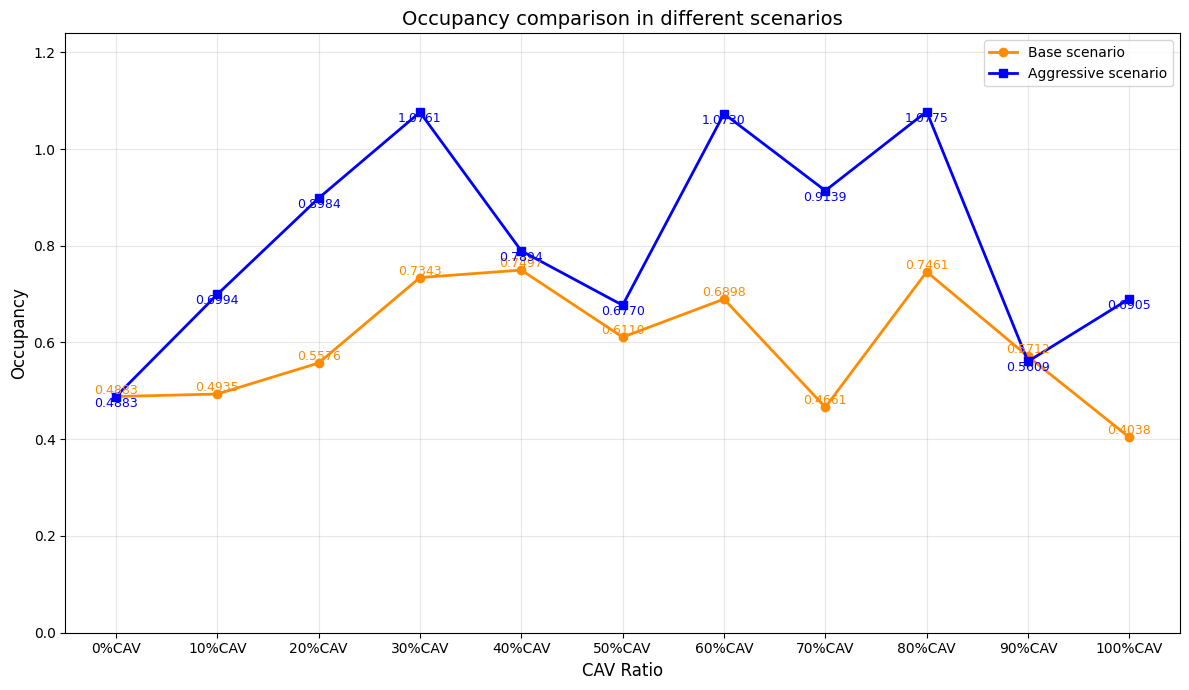

In [1]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt


# 定义新旧两组数据路径
base_folders = [
    r"C:\Users\yuyazhao\Desktop\AVpenetration\0cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\1cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\2cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\3cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\4cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\5cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\6cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\7cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\8cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\9cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\10cav\base"
]

aggressive_folders = [
    r"C:\Users\yuyazhao\Desktop\AVpenetration\0cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\1cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\2cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\3cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\4cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\5cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\6cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\7cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\8cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\9cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\10cav\aggressive"
]

labels = ['0%CAV', '10%CAV', '20%CAV','30%CAV', '40%CAV', '50%CAV', '60%CAV', '70%CAV', '80%CAV', '90%CAV', '100%CAV']

def process_folder(folders):
    """处理指定文件夹组，返回平均占有率列表"""
    averages = []
    for folder in folders:
        file_path = os.path.join(folder, 'detectors.xml')
        tree = ET.parse(file_path)
        root = tree.getroot()
        
        occupancies = []
        for interval in root.findall('interval'):
            occupancy = float(interval.get('occupancy'))
            occupancies.append(occupancy if occupancy >= 0 else 0)
        
        avg = sum(occupancies)/len(occupancies) if occupancies else 0
        averages.append(avg)
    return averages

# 处理两组数据
base_avg = process_folder(base_folders)
aggressive_avg = process_folder(aggressive_folders)

# 创建图表
plt.figure(figsize=(12, 7))

# 绘制两组数据
plt.plot(labels, base_avg, marker='o', linestyle='-', linewidth=2, 
         color='darkorange', label='Base scenario')
plt.plot(labels, aggressive_avg, marker='s', linestyle='-', linewidth=2,
         color='blue', label='Aggressive scenario')

# 设置图表属性
plt.title('Occupancy comparison in different scenarios', fontsize=14)
plt.xlabel('CAV Ratio', fontsize=12)
plt.ylabel('Occupancy', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=10)

# 自动设置y轴范围
max_value = max(max(base_avg), max(aggressive_avg))
plt.ylim(0, max_value * 1.15)

# 添加数据标签
for x, y in zip(labels, base_avg):
    plt.text(x, y, f'{y:.4f}', ha='center', va='bottom', fontsize=9, color='darkorange')

for x, y in zip(labels, aggressive_avg):
    plt.text(x, y, f'{y:.4f}', ha='center', va='top', fontsize=9, color='blue')

plt.tight_layout()
plt.show()

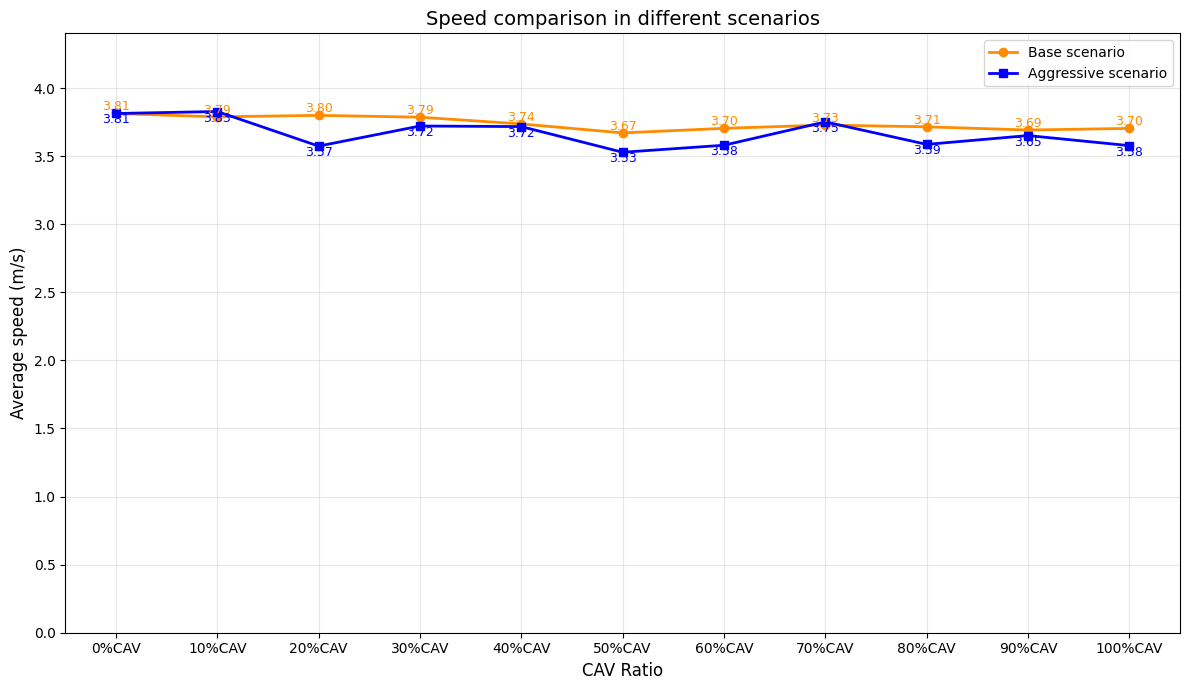

In [2]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# 定义新旧两组数据路径
base_folders = [
    r"C:\Users\yuyazhao\Desktop\AVpenetration\0cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\1cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\2cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\3cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\4cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\5cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\6cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\7cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\8cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\9cav\base",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\10cav\base"
]

aggressive_folders = [
    r"C:\Users\yuyazhao\Desktop\AVpenetration\0cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\1cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\2cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\3cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\4cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\5cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\6cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\7cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\8cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\9cav\aggressive",
    r"C:\Users\yuyazhao\Desktop\AVpenetration\10cav\aggressive"
]

labels = ['0%CAV', '10%CAV', '20%CAV','30%CAV', '40%CAV', '50%CAV', '60%CAV', '70%CAV', '80%CAV', '90%CAV', '100%CAV']

def process_speed_data(folders):
    """处理指定文件夹组，返回平均速度列表"""
    averages = []
    for folder in folders:
        file_path = os.path.join(folder, 'detectors.xml')
        tree = ET.parse(file_path)
        root = tree.getroot()
        
        speeds = []
        for interval in root.findall('interval'):
            speed = float(interval.get('harmonicMeanSpeed'))
            speeds.append(speed if speed >= 0 else 0)
        
        avg = sum(speeds)/len(speeds) if speeds else 0
        averages.append(avg)
    return averages

# 处理两组数据
base_avg = process_speed_data(base_folders)
aggressive_avg = process_speed_data(aggressive_folders)

# 创建对比图表
plt.figure(figsize=(12, 7))

# 绘制两组速度曲线
plt.plot(labels, base_avg, marker='o', linestyle='-', linewidth=2,
         color='darkorange', label='Base scenario')
plt.plot(labels, aggressive_avg, marker='s', linestyle='-', linewidth=2,
         color='blue', label='Aggressive scenario')

# 设置图表属性
plt.title('Speed comparison in different scenarios', fontsize=14)
plt.xlabel('CAV Ratio', fontsize=12)
plt.ylabel('Average speed (m/s)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=10)

# 自动设置y轴范围
max_speed = max(max(base_avg), max(aggressive_avg))
plt.ylim(0, max_speed * 1.15)

# 添加数据标签
for x, y in zip(labels, base_avg):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', 
             fontsize=9, color='darkorange')

for x, y in zip(labels, aggressive_avg):
    plt.text(x, y, f'{y:.2f}', ha='center', va='top', 
             fontsize=9, color='blue')

plt.tight_layout()
plt.show()